# Evaluate image data

In [1]:
# import module

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib
import pandas as pd

## 画像の評価方法

画像のサイズはまちまちである．また，画像の中に文字が入っていたり，特殊な例があるので以下の手順でカテゴリごとのデータを評価する．

1. まず，全ての画像の面積を $C$ (定数)とする．
1. $C$ に従う様に画像の面積を変更するが，縦横比(縦を $y$, 横を $x$ とする)は元の画像と同じにする．  
変換後の画像の縦,横( $y', x'$)は以下の連立方程式より，
\begin{equation}
  \begin{cases}
    x' \times y' &= C\\
    x' : y' &= x : y
  \end{cases}
\end{equation}
以下のように求められる．
\begin{align}
    y' = \sqrt{\frac{y}{x} C} \\
    x' = \sqrt{\frac{x}{y} C}
\end{align}
1. 変換後の画像を中心を合わせて，一枚の大きな(全ての画像が収まるくらいの)画像に貼り付けていく．
1. 貼り合わせた画像を平均化し，カテゴリと対応した画像となっているか，目で見て分かるかで判定する．

## まずはclf_train_images_labeled_1,2で試してみる

In [2]:
# dir path that has image data
dir_path = pathlib.Path('../data/dish')
dir_path_abs = dir_path.resolve()
label_path = pathlib.Path('../data/dish/clf_train_master.tsv').resolve()

In [3]:
label_df = pd.read_csv(label_path, delimiter='\t')
label_df.head(n=10)

file_name  category_id
0  train_0.jpg            4
1  train_1.jpg           21
2  train_2.jpg           16
3  train_3.jpg           20
4  train_4.jpg           24
5  train_5.jpg           23
6  train_6.jpg            4
7  train_7.jpg           23
8  train_8.jpg            5
9  train_9.jpg           20

In [4]:
image_paths = []
for image_path in dir_path_abs.glob("clf_train_images_labeled*/*.jpg"):
    image_paths.append(image_path)

In [5]:
# sort path
image_paths.sort(key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))
image_paths[:10]

[PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_0.jpg'),
 PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_1.jpg'),
 PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_2.jpg'),
 PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_3.jpg'),
 PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_4.jpg'),
 PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_5.jpg'),
 PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_6.jpg'),
 PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_7.jpg'),
 PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_8.jpg'),
 PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_1/train_9.jpg')]

In [6]:
image_paths[-1]

PosixPath('/home/yohei/Documents/tlab/data/dish/clf_train_images_labeled_2/train_9999.jpg')

In [7]:
df = pd.concat((label_df, pd.Series(image_paths)),axis=1)
columns = list(df.columns)
columns[2] = "file path"
df.columns = columns
df.head()

file_name  category_id                                          file path
0  train_0.jpg            4  /home/yohei/Documents/tlab/data/dish/clf_train...
1  train_1.jpg           21  /home/yohei/Documents/tlab/data/dish/clf_train...
2  train_2.jpg           16  /home/yohei/Documents/tlab/data/dish/clf_train...
3  train_3.jpg           20  /home/yohei/Documents/tlab/data/dish/clf_train...
4  train_4.jpg           24  /home/yohei/Documents/tlab/data/dish/clf_train...

### label=0に対して行う

In [8]:
label=13
cat_image = [
    cv2.imread(str(image_path_cat))
    for image_path_cat in df.loc[df.category_id == label, "file path"]
]
len(cat_image)

403

In [9]:
# 最小の面積を求める
s_min = np.inf
for idx, image in enumerate(cat_image):
    x, y = image.shape[:2]
    if x * y < s_min:
        s_min = x * y
        k = idx
s_min

19200

In [10]:
# その時のshape
cat_image[k].shape

(160, 120, 3)

In [11]:
# 最大の面積を求める
s_max = 0
for idx, image in enumerate(cat_image):
    x, y = image.shape[:2]
    if x * y > s_max:
        s_max = x * y
        j = idx
s_max

1778000

In [12]:
# その時のshape
cat_image[j].shape

(1778, 1000, 3)

In [13]:
# 平均の大きさを求める
s = np.array([image.shape[0] * image.shape[1] for image in cat_image])
s.max(), s.min(), s.mean()

(1778000, 19200, 437232.7617866005)

In [14]:
C = int(s.mean())
C

437232

original length: 1333, width: 1000
length: 763, width: 572


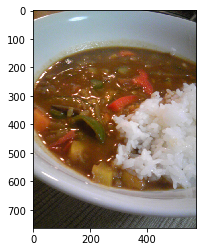

original length: 480, width: 640
length: 572, width: 763


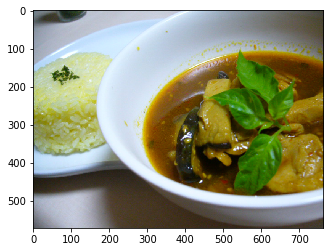

original length: 210, width: 280
length: 572, width: 763


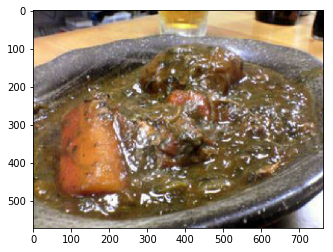

original length: 1502, width: 1000
length: 810, width: 539


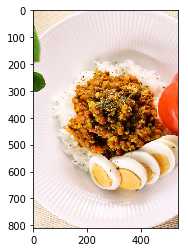

original length: 320, width: 240
length: 763, width: 572


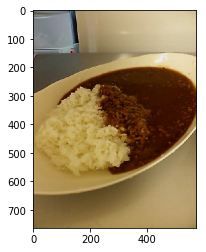

original length: 750, width: 1000
length: 572, width: 763


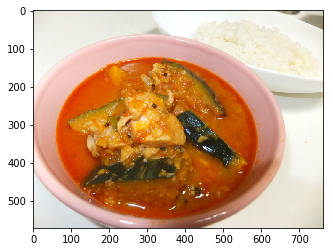

original length: 750, width: 1000
length: 572, width: 763


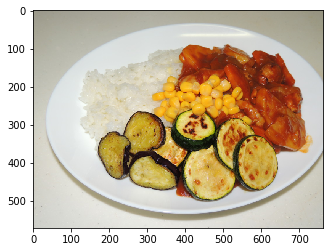

original length: 512, width: 384
length: 763, width: 572


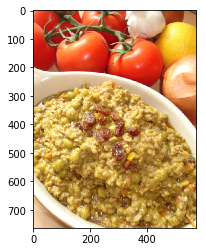

original length: 240, width: 320
length: 572, width: 763


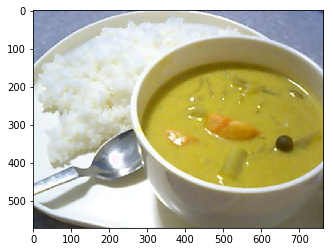

original length: 210, width: 280
length: 572, width: 763


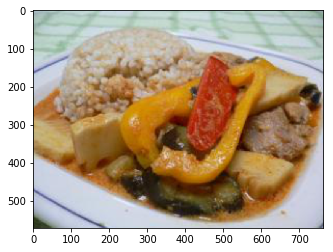

original length: 210, width: 280
length: 572, width: 763


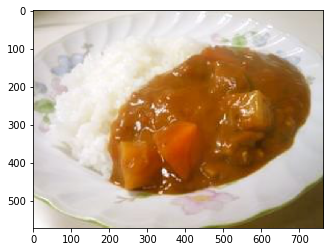

original length: 425, width: 640
length: 538, width: 811


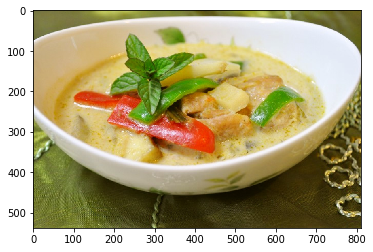

original length: 1333, width: 1000
length: 763, width: 572


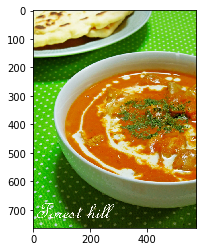

original length: 1000, width: 663
length: 812, width: 538


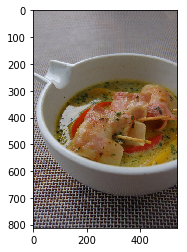

original length: 750, width: 1000
length: 572, width: 763


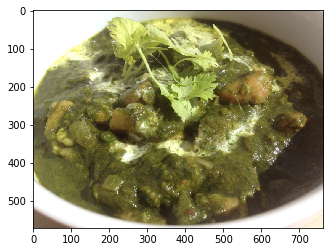

original length: 1000, width: 747
length: 765, width: 571


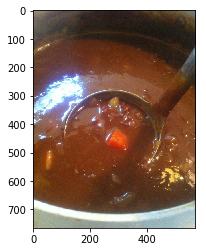

original length: 1334, width: 1000
length: 763, width: 572


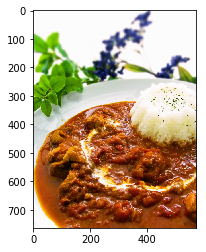

original length: 373, width: 280
length: 763, width: 572


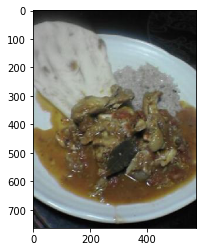

original length: 480, width: 640
length: 572, width: 763


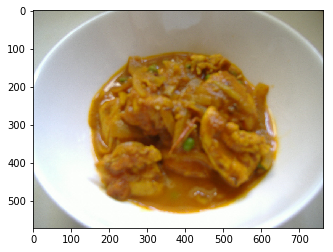

original length: 750, width: 1000
length: 572, width: 763


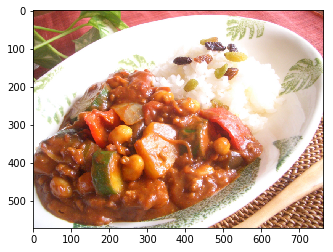

original length: 480, width: 640
length: 572, width: 763


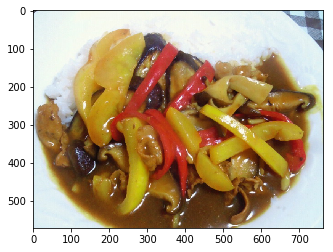

original length: 480, width: 640
length: 572, width: 763


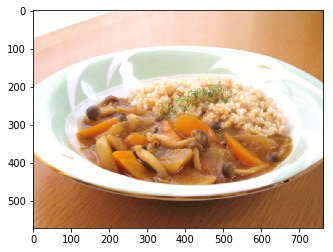

original length: 664, width: 1000
length: 538, width: 811


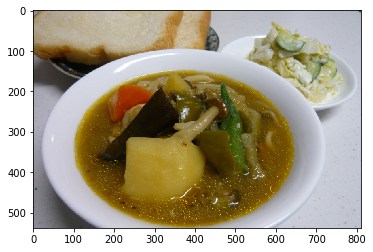

original length: 750, width: 1000
length: 572, width: 763


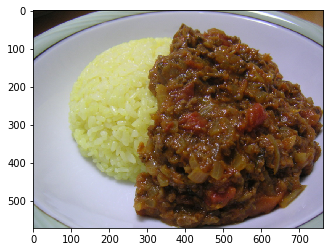

original length: 300, width: 400
length: 572, width: 763


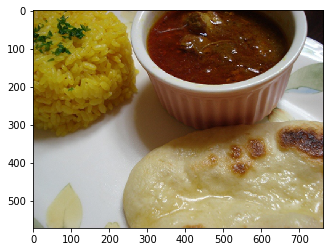

original length: 188, width: 250
length: 573, width: 762


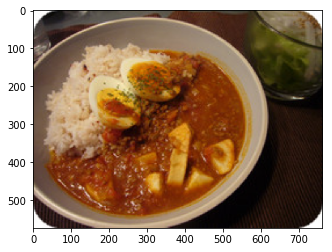

original length: 210, width: 280
length: 572, width: 763


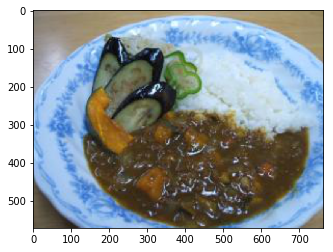

original length: 750, width: 1000
length: 572, width: 763


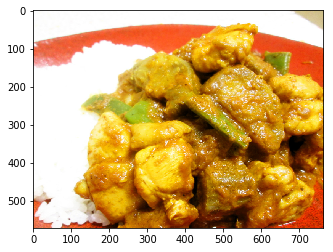

original length: 750, width: 1000
length: 572, width: 763


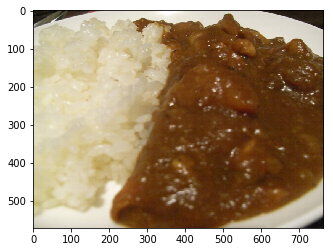

original length: 210, width: 280
length: 572, width: 763


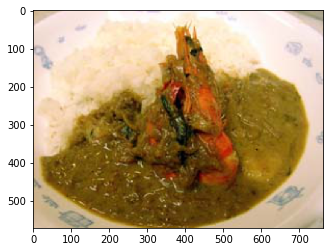

In [15]:
# 画像をリサイズ
rsiz_cat_image = []
n = 0
for image in cat_image:
    y, x = image.shape[:2]
    if x * y < C:  # 拡大:interpolation=cv2.INTER_LINEAR
        interpolation = cv2.INTER_LINEAR
    else:  # 縮小:interpolation=cv2.INTER_AREA
        interpolation = cv2.INTER_AREA
    dy = np.sqrt(y / x * C)
    dx = np.sqrt(x / y * C)
    #ratio = C / x*y
    image = cv2.resize(image, dsize=(int(dx), int(dy)), interpolation=interpolation)
    #image = cv2.resize(image, fx=ratio,fy=ratio, interpolation=interpolation)
    rsiz_cat_image.append(image)
    if n < 30:
        dy, dx = image.shape[:2]
        print("original length: {0}, width: {1}".format(y, x))
        print("length: {0}, width: {1}".format(dy, dx))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
        n+=1

In [16]:
# resizeできているかの確認
rsiz_cat_image[0].shape[0] * rsiz_cat_image[0].shape[1], cat_image[0].shape[
    0] * cat_image[0].shape[1]

(436436, 1333000)

In [30]:
# リサイズ後の最大値を探す
y_max = 0
x_max = 0
for idx, image in enumerate(rsiz_cat_image):
    x, y = image.shape[:2]
    if x > x_max:
        x_max = x
        j=idx
    if y > y_max:
        y_max = y
        k=idx
x_max, y_max

(882, 1332)

In [33]:
k

182

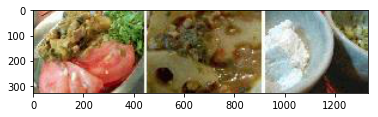

In [34]:
plt.imshow(cv2.cvtColor(rsiz_cat_image[k], cv2.COLOR_BGR2RGB))

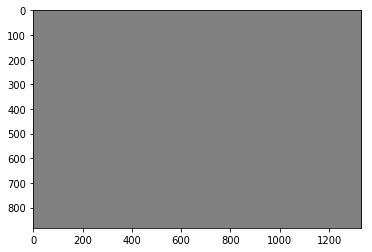

In [18]:
# 画像の貼りあわせする元画像の生成
gray_image = np.ones(shape=(x_max, y_max, 3), dtype="int") * 128
plt.imshow(gray_image)

In [19]:
gray_image.shape

(882, 1332, 3)

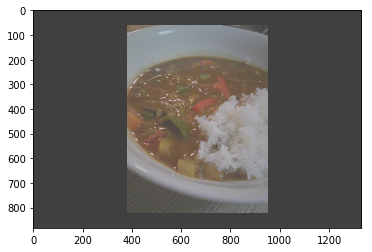

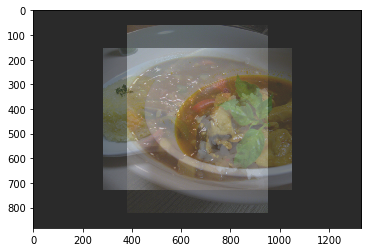

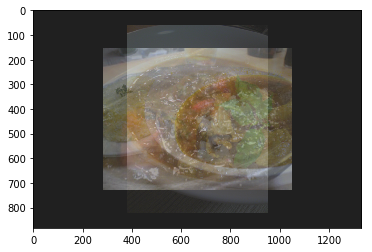

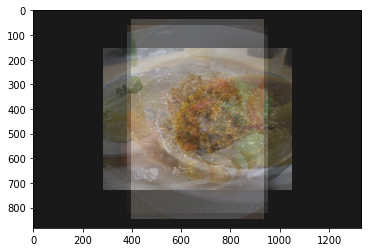

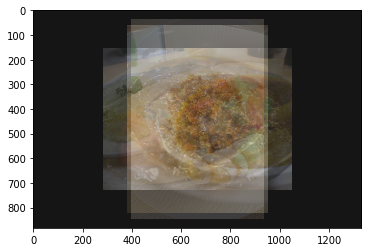

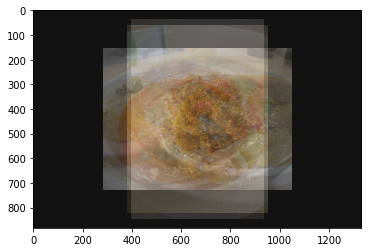

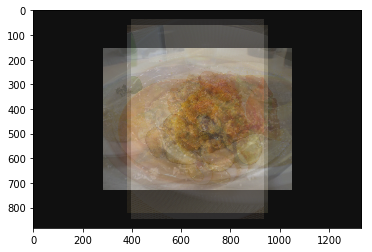

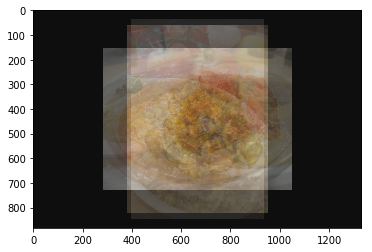

In [27]:
# 画像の貼りあわせ
sum_image = gray_image.astype("f")
center = (gray_image.shape[0] // 2, gray_image.shape[1] // 2)
n = 2
for image in rsiz_cat_image:
    length, width = image.shape[:2]
    dy, dx = length // 2, width // 2
    # print("y:",center[0] - dy,center[0] + dy,"x:", center[1] - dx,center[1] + dx)
    # print(image.shape)
    sum_image[center[0] - dy:center[0] + dy, center[1] - dx:
              center[1] + dx, :] += image[0:2 * dy, 0:2 * dx, :].astype("f")
    if n<10:
        plt.imshow(cv2.cvtColor((sum_image) / n / 255, cv2.COLOR_BGR2RGB))
        plt.show()
        n += 1

In [28]:
mean_image = sum_image/(len(rsiz_cat_image)+1)
mean_image.min(), mean_image.max()

(0.31683168, 180.30199)

[正規化](https://mathwords.net/dataseikika)

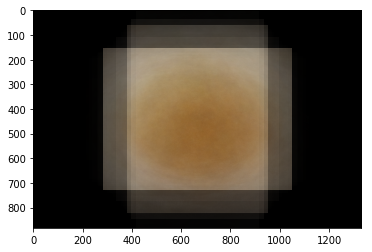

In [29]:
"""
# 0 ~ 1の間に正規化
for ch in range(3):
    mean_image[:, :, ch] = (
        mean_image[:, :, ch] - mean_image[:, :, ch].min()) / (
            mean_image[:, :, ch].max() - mean_image[:, :, ch].min())
"""
# 表示
plt.imshow(cv2.cvtColor(mean_image/255, cv2.COLOR_BGR2RGB))
plt.savefig('cat_{}.jpg'.format(label))

### labelを全カテゴリー(0~24)に変えて試す

In [37]:
cat_path = dir_path_abs/ "clf_category_master.tsv"
cat_df = pd.read_csv(cat_path, delimiter='\t')
cat_df.head()

category_name  category_id
0  bread_sandwich            0
1    bread_sliced            1
2    bread_sweets            2
3     bread_table            3
4    noodle_somen            4

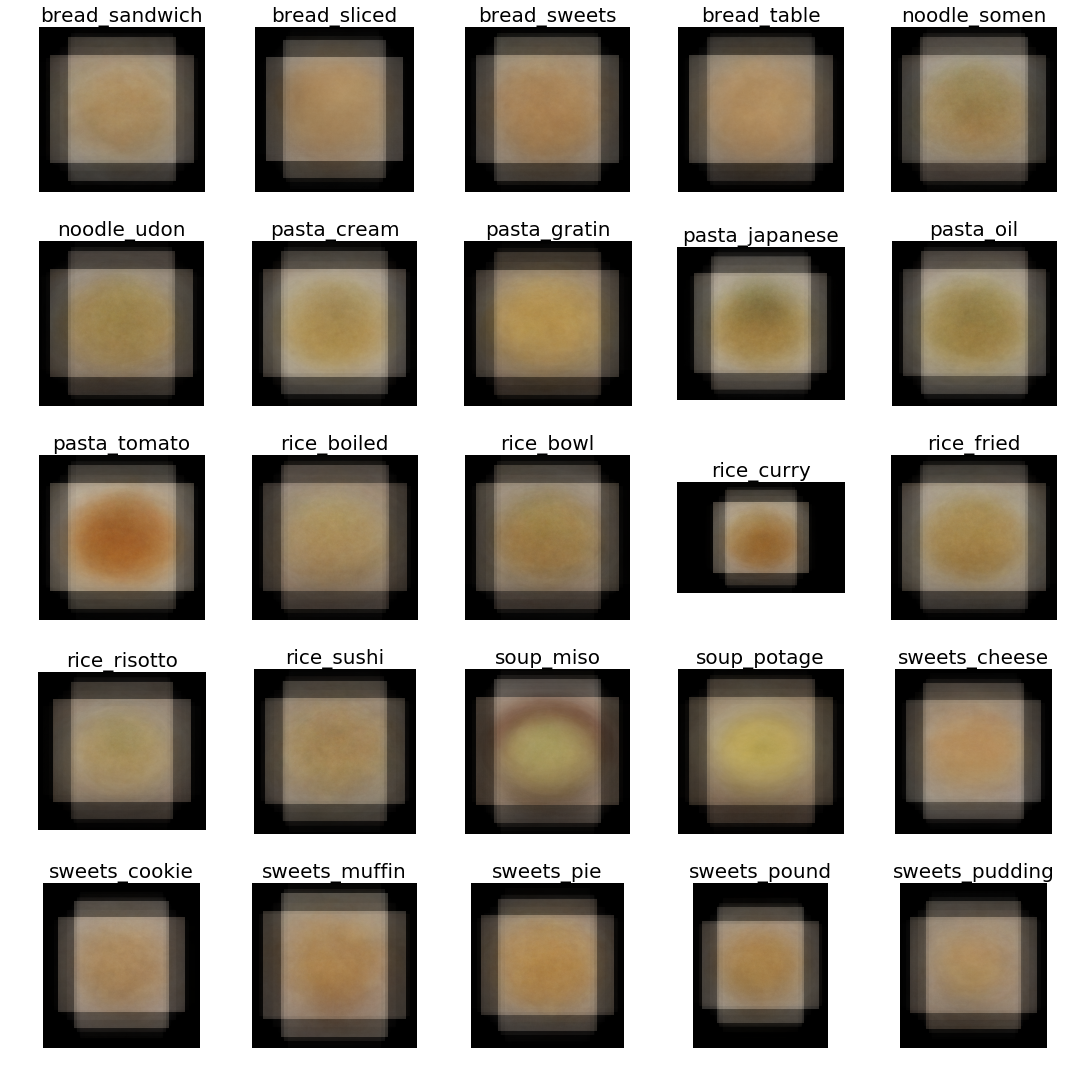

In [53]:
plt.style.use("ggplot")
cat_name = cat_df["category_name"]
cat_id = cat_df["category_id"]
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

for title, label, ax in zip(cat_name, cat_id, axes.flat):
    cat_image = [
        cv2.imread(str(image_path_cat))
        for image_path_cat in df.loc[df.category_id == label, "file path"]
    ]
    # 平均の大きさを求め，Cとする
    s = np.array([image.shape[0] * image.shape[1] for image in cat_image])
    C = int(s.mean())
    # 画像をリサイズ
    rsiz_cat_image = []
    n = 0
    for image in cat_image:
        y, x = image.shape[:2]
        if x * y < C:  # 拡大:interpolation=cv2.INTER_LINEAR
            interpolation = cv2.INTER_LINEAR
        else:  # 縮小:interpolation=cv2.INTER_AREA
            interpolation = cv2.INTER_AREA
        dy = np.sqrt(y / x * C)
        dx = np.sqrt(x / y * C)
        #ratio = C / x*y
        image = cv2.resize(image, dsize=(int(dx), int(dy)), interpolation=interpolation)
        #image = cv2.resize(image, fx=ratio,fy=ratio, interpolation=interpolation)
        rsiz_cat_image.append(image)
    # リサイズ後の最大値を探す
    y_max = 0
    x_max = 0
    for idx, image in enumerate(rsiz_cat_image):
        x, y = image.shape[:2]
        if x > x_max:
            x_max = x
            j=idx
        if y > y_max:
            y_max = y
            k=idx
    # 画像の貼りあわせする元画像の生成
    gray_image = np.ones(shape=(x_max, y_max, 3), dtype="int") * 0
    # 画像の貼りあわせ
    sum_image = gray_image.astype("f")
    center = (gray_image.shape[0] // 2, gray_image.shape[1] // 2)
    n = 2
    for image in rsiz_cat_image:
        length, width = image.shape[:2]
        dy, dx = length // 2, width // 2
        sum_image[center[0] - dy:center[0] + dy, center[1] - dx:
              center[1] + dx, :] += image[0:2 * dy, 0:2 * dx, :].astype("f")
    mean_image = sum_image/(len(rsiz_cat_image)+1)
    # 表示
    ax.imshow(cv2.cvtColor(mean_image/255, cv2.COLOR_BGR2RGB))
    ax.axis("off")
    ax.set_title(title, fontsize="20")
plt.tight_layout()
#fig.savefig('eval_image.jpg')
plt.show()

    

In [45]:
axes.flat